In [2]:
import pandas as pd
import numpy as np
import json
import ast
import re
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
#from icecream import ic
pd.options.mode.chained_assignment = None  # default='warn'

Even in 1st time period, all 26 YO2E/10 Classifications existed - what does this mean about cluster num,bers?

In [51]:
df = pd.read_csv('adf_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_vector

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,G21,H01,H02,H03,H04,H05,H99,Y02,Y04,Y10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.488095,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.764903,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.696055,0.010101,0.0,0.0,0.0,0.0,1.696055,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.114907,0.317271,0.0,0.0,0.0,0.0,0.672033,0.0,0.435852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
115714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
115715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
115716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [52]:
df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]
df_dropped

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,G21,H01,H02,H03,H04,H05,H99,Y02,Y04,Y10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.488095,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.764903,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.696055,0.010101,0.0,0.0,0.0,0.0,1.696055,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.114907,0.317271,0.0,0.0,0.0,0.0,0.672033,0.0,0.435852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.032258,0.000000,0.0,0.0,0.0,0.0,0.032258,0.0,0.000000
115600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.257576,0.0,0.000000
115657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000
115668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.016264,0.016264,0.0,0.0,0.0,0.0,0.016264,0.0,0.000000


**Data frame which only contains vector columns which columns and rows that are wholly zero having been dropped!**

In [53]:
count = np.isinf(df_dropped).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 60 infinite values


In [54]:
df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)

A01    0
A21    0
A22    0
A23    0
A24    0
      ..
H05    0
H99    0
Y02    0
Y04    0
Y10    0
Length: 125, dtype: int64

### Create vector data frame that include CPC codes and re index ready for merge with predictions !

In [55]:
df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])

In [56]:
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]
df_cpc

,cpc_codes,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...
115713,"['H01L31/056', 'H01L31/02008', 'H01L31/0216', ...",['SOLAR CELL MODULE']
115714,"['C07F7/30', 'C07C211/62', 'H01L51/424', 'Y02E...",['PEROVSKITE COMPOUND AND PHOTOCONVERSION DEVI...
115715,"['H01L27/32', 'H01L27/3246', 'H01L27/3258', 'H...",['THIN FILM TRANSISTOR SUBSTRATES AND DISPLAY ...
115716,"['C07F3/02', 'C07F3/06', 'C07F5/022', 'C09K11/...","['Electronic Device, Method for Preparing the ..."


In [57]:
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc

,index,A01,A21,A22,A23,A24,A41,A42,A43,A44,...,H02,H03,H04,H05,H99,Y02,Y04,Y10,cpc_codes,invention_title
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.488095,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.764903,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010101,0.0,0.0,0.0,0.0,1.696055,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.317271,0.0,0.0,0.0,0.0,0.672033,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62042,115579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.032258,0.0,0.000000,"['H01L27/1218', 'H01L27/124', 'H01L27/1218', '...",['DISPLAY DEVICE']
62043,115600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.257576,0.0,0.000000,"['E04H9/0215', 'E04H9/0215', 'F03D13/20', 'F16...",['ARRANGEMENTS AND METHODS FOR DAMPING OSCILLA...
62044,115657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,"['C07D495/20', 'C07D495/22', 'H01L51/0061', 'H...",['DISPIRO-OXEPINE/THIAPINE DERIVATIVES FOR OPT...
62045,115668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016264,0.0,0.0,0.0,0.0,0.016264,0.0,0.000000,"['F03D7/0284', 'F03D9/255', 'F05B2220/70646', ...",['System and Method for Minimizing Inrush of C...


### Normalising

In [58]:
# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

# Cluster Counts

In [13]:
def get_cpc_cluster_count(prediction_df, label, cpc_stem='Y02E10', **kwargs):
    filtered_df = prediction_df[prediction_df.Y == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
    print(f'CLUSTER {label}')
    print(cpc_stem_series.value_counts(**kwargs))

# Clustering

## 1980 - 1995

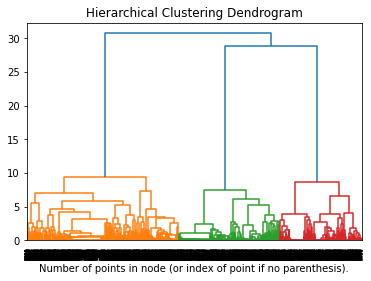

In [40]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#plot_dendrogram(model, truncate_mode='level', p=3)

In [64]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X, y_tp1, metric='euclidean')

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.3181674426459285

In [87]:
def get_cpc_cluster_count(prediction_df, label, cpc_stem='Y02E10', **kwargs):
    filtered_df = prediction_df[prediction_df.Y == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
    print(f'CLUSTER {label}')
    print(cpc_stem_series.value_counts(**kwargs))

# 1980 - 2008

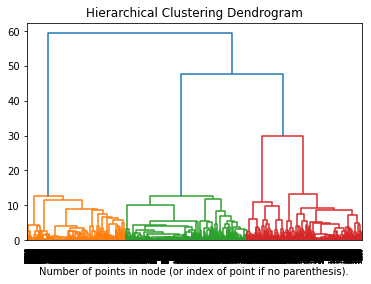

In [23]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#plot_dendrogram(model, truncate_mode='level', p=3)

# TP3 1980 - 2011

# ATP3

In [3]:
df = pd.read_csv('atp3_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

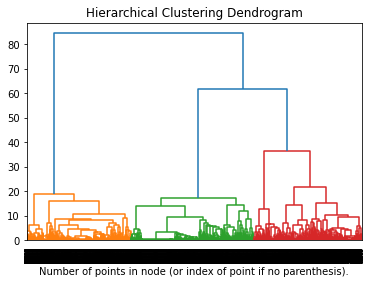

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#plot_dendrogram(model, truncate_mode='level', p=3)

# TP4 1980 - 2014

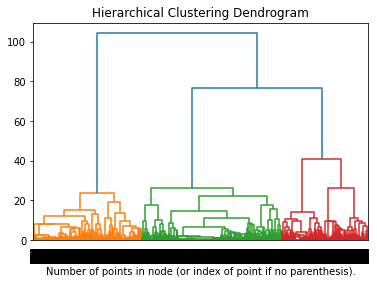

In [32]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#plot_dendrogram(model, truncate_mode='level', p=3)

# TP5 1980 - 2017

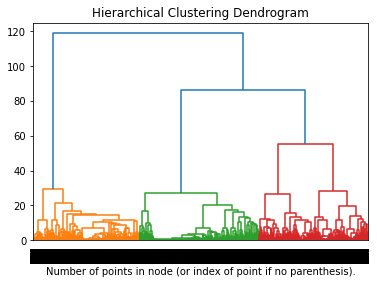

In [49]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#plot_dendrogram(model, truncate_mode='level', p=3)

# TP6 1980 - 2020

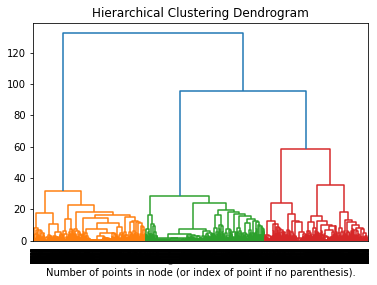

In [59]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#plot_dendrogram(model, truncate_mode='level', p=3)